<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/V1_player_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/rugby_frames.zip

--2023-05-18 22:31:12--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/rugby_frames.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/rugby_frames.zip [following]
--2023-05-18 22:31:12--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/rugby_frames.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20613991 (20M) [application/zip]
Saving to: ‘rugby_frames.zip’

rugby_frames.zip    100%[===================>]  19.66M  --.-KB/s    in 0.1s    

2023-05-18 22:31:12 (141 MB/s) -

In [2]:
!unzip rugby_frames.zip

Archive:  rugby_frames.zip
  inflating: output_016.png          
  inflating: output_001.png          
  inflating: output_002.png          
  inflating: output_003.png          
  inflating: output_004.png          
  inflating: output_005.png          
  inflating: output_006.png          
  inflating: output_007.png          
  inflating: output_008.png          
  inflating: output_009.png          
  inflating: output_010.png          
  inflating: output_011.png          
  inflating: output_012.png          
  inflating: output_013.png          
  inflating: output_014.png          
  inflating: output_015.png          


In [3]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/labels_rugby_2023-05-18-10-24-47.csv

--2023-05-18 22:31:16--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/labels_rugby_2023-05-18-10-24-47.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/labels_rugby_2023-05-18-10-24-47.csv [following]
--2023-05-18 22:31:16--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/labels_rugby_2023-05-18-10-24-47.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11235 (11K) [text/plain]
Saving to: ‘labels_rugby_2023-05-18-10-24-47.csv’

labels_rugby_2023-0 100%[================

In [4]:
import pandas as pd

In [5]:
labels = pd.read_csv("/content/labels_rugby_2023-05-18-10-24-47.csv")
labels

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,person,1299,200,46,94,output_001.png,2688,1512
1,person,1416,262,37,104,output_001.png,2688,1512
2,person,620,327,52,103,output_001.png,2688,1512
3,person,653,778,59,132,output_001.png,2688,1512
4,person,1605,464,46,120,output_001.png,2688,1512
...,...,...,...,...,...,...,...,...
233,person,1428,745,54,122,output_014.png,2688,1512
234,person,1524,714,50,117,output_014.png,2688,1512
235,person,1812,627,47,101,output_014.png,2688,1512
236,person,1799,752,55,120,output_014.png,2688,1512


In [6]:
df = labels

# Group the dataframe by image_name and aggregate the bounding boxes into a list
grouped = df.groupby('image_name').apply(lambda x: x[['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']].values.tolist())

# Create a list of dictionaries with image_name and normalized_bboxes
result = []
for image_name, bboxes in grouped.items():
    normalized_bboxes = []
    for bbox in bboxes:
        bbox_x, bbox_y, bbox_width, bbox_height = bbox
        image_width = df.loc[df['image_name'] == image_name, 'image_width'].iloc[0]
        image_height = df.loc[df['image_name'] == image_name, 'image_height'].iloc[0]
        
        normalized_bbox = [
            bbox_x / image_width,
            bbox_y / image_height,
            bbox_width / image_width,
            bbox_height / image_height
        ]
        normalized_bboxes.append(normalized_bbox)
    
    result.append({'image_name': image_name, 'normalized_bboxes': normalized_bboxes})

# Print the resulting list of dictionaries
for item in result:
    print(item)

{'image_name': 'output_001.png', 'normalized_bboxes': [[0.48325892857142855, 0.13227513227513227, 0.01711309523809524, 0.062169312169312166], [0.5267857142857143, 0.17328042328042328, 0.013764880952380952, 0.06878306878306878], [0.23065476190476192, 0.21626984126984128, 0.019345238095238096, 0.06812169312169312], [0.24293154761904762, 0.5145502645502645, 0.02194940476190476, 0.0873015873015873], [0.5970982142857143, 0.30687830687830686, 0.01711309523809524, 0.07936507936507936], [0.6268601190476191, 0.3941798941798942, 0.0234375, 0.05489417989417989], [0.7503720238095238, 0.5562169312169312, 0.025297619047619048, 0.09126984126984126], [0.7704613095238095, 0.5747354497354498, 0.025297619047619048, 0.0992063492063492]]}
{'image_name': 'output_002.png', 'normalized_bboxes': [[0.18415178571428573, 0.35185185185185186, 0.020089285714285716, 0.07076719576719577], [0.2034970238095238, 0.6633597883597884, 0.027901785714285716, 0.08267195767195767], [0.44642857142857145, 0.20634920634920634, 0.

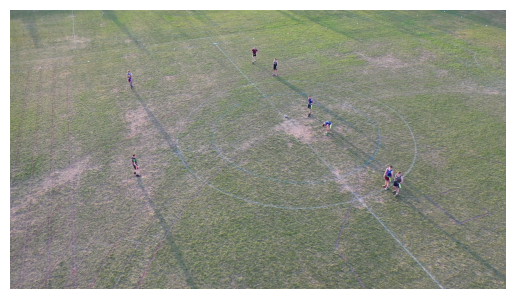

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path or filename of the image
image_path = '/content/output_001.png'  # Replace with the actual image file path

# Load the image using matplotlib's `imread` function
image = mpimg.imread(image_path)

# Display the image using matplotlib's `imshow` function
plt.imshow(image)
plt.axis('off')  # Optional: Turn off the axis labels
plt.show()

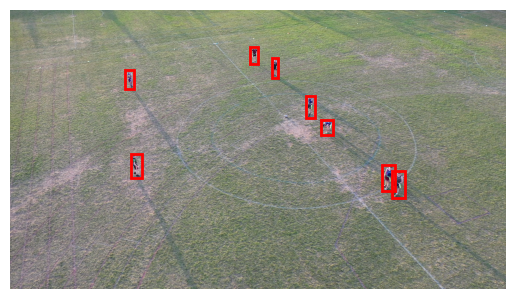

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming your list of lists is named "bbox_list"
bbox_list = result[0]['normalized_bboxes']

# Load the image using matplotlib's `imread` function (replace with your own image loading code)
image_path = '/content/output_001.png'  # Replace with the actual image file path
image = plt.imread(image_path)

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Iterate through the list of bounding box coordinates
for bbox in bbox_list:
    min_x, min_y, width, height = bbox
    i_height, i_width, _ = image.shape
    
    # Create a rectangle patch
    rect = patches.Rectangle((min_x*i_width, min_y*i_height), width*i_width, height*i_height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the rectangle patch to the axes
    ax.add_patch(rect)

# Show the plot
plt.axis('off')  # Optional: Turn off the axis labels
plt.show()

In [9]:
image.shape

(605, 1075, 3)

In [10]:
import numpy as np

def generate_mask(bbox_list, resolution):
    """
    Generate a boolean NumPy mask based on a list of normalized bounding box coordinates.
    
    Args:
        bbox_list (list): List of normalized bounding box coordinates in the format [min_x, min_y, width, height].
        resolution (tuple): Resolution of the mask as a tuple (width, height).
    
    Returns:
        numpy.ndarray: Boolean NumPy mask with the specified resolution.
    """
    # Create an empty mask with the specified resolution
    mask = np.zeros(resolution, dtype=bool)

    # Iterate through the list of normalized bounding box coordinates
    for bbox in bbox_list:
        min_x, min_y, width, height = bbox

        # Calculate the pixel coordinates of the bounding box
        x1 = int(min_x * resolution[1])
        y1 = int(min_y * resolution[0])
        x2 = int((min_x + width) * resolution[1])
        y2 = int((min_y + height) * resolution[0])

        # Set the region within the bounding box to True in the mask
        mask[y1:y2, x1:x2] = True

    return mask


In [11]:
mask = generate_mask(bbox_list, [200,400])

In [12]:
masks = []
for l in result:
  masks.append(generate_mask(l["normalized_bboxes"], [400,700]))

masks = np.array(masks)
masks.shape

(14, 400, 700)

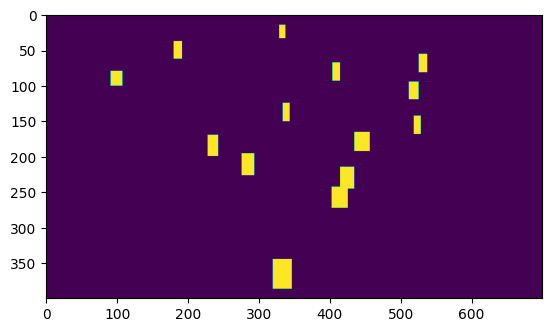

In [13]:
plt.imshow(masks[2])

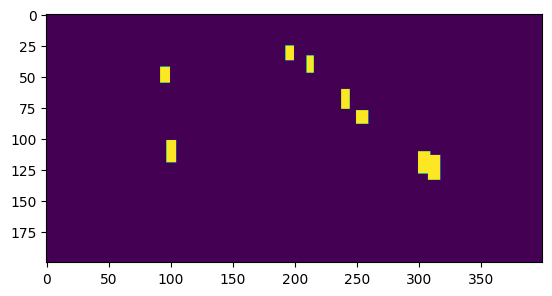

In [14]:
plt.imshow(mask)

In [15]:
import os
from PIL import Image
import numpy as np

# Specify the directory path containing PNG files
directory = '/content'  # Replace with the actual directory path

# Get a list of PNG file names in the directory, sorted in file name order
png_files = sorted([file for file in os.listdir(directory) if file.endswith('.png')])

# Read and resize PNG files into a NumPy matrix
images = []
for png_file in png_files:
    image_path = os.path.join(directory, png_file)
    image = Image.open(image_path)
    resized_image = image.resize((700, 400))  # Specify the desired new width and height
    image_array = np.array(resized_image)
    images.append(image_array)

# Convert the list of images into a NumPy matrix
images_matrix = np.stack(images)

# Print the shape of the matrix
print(images_matrix.shape)

(16, 400, 700, 3)


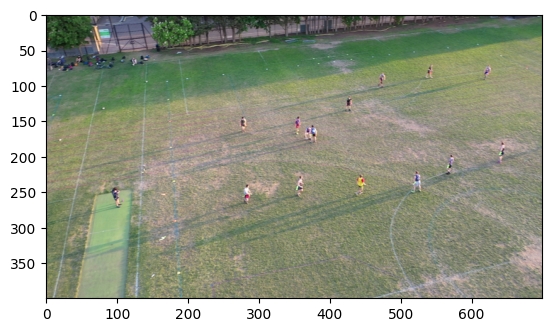

In [16]:
plt.imshow(images_matrix[4])

In [17]:
X = images_matrix[:14] / 255.
y = masks.astype(float)

X.shape, y.shape

((14, 400, 700, 3), (14, 400, 700))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.2, random_state=42)

In [20]:
import tensorflow as tf
from tensorflow import keras


In [65]:
input_shape = (400, 700, 3)

# Create the model
model = keras.Sequential()

# Add layers to the model
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 400, 700, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 400, 700, 32)      9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 400, 700, 32)      9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 400, 700, 32)      9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 400, 700, 32)      9248      
                                                                 
 conv2d_10 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 400, 700, 1)      

In [67]:
full_history = {}

In [68]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 3s 289ms/step - loss: 0.7328 - val_loss: 0.6449
Epoch 2/100
2/2 [==============================] - 1s 88ms/step - loss: 0.6419 - val_loss: 0.5611
Epoch 3/100
2/2 [==============================] - 0s 91ms/step - loss: 0.5553 - val_loss: 0.3922
Epoch 4/100
2/2 [==============================] - 0s 89ms/step - loss: 0.3847 - val_loss: 0.1619
Epoch 5/100
2/2 [==============================] - 0s 90ms/step - loss: 0.1673 - val_loss: 0.0900
Epoch 6/100
2/2 [==============================] - 0s 89ms/step - loss: 0.1180 - val_loss: 0.1330
Epoch 7/100
2/2 [==============================] - 0s 94ms/step - loss: 0.1773 - val_loss: 0.1591
Epoch 8/100
2/2 [==============================] - 0s 95ms/step - loss: 0.2095 - val_loss: 0.1503
Epoch 9/100
2/2 [==============================] - 0s 94ms/step - loss: 0.1965 - val_loss: 0.1225
Epoch 10/100
2/2 [==============================] - 0s 93ms/step - loss: 0.1594 - val_loss: 0.0957
Epoch 11/100
2/2 [

In [69]:
# Append the current epoch history to the full history
for key, value in history.history.items():
    if key not in full_history:
        full_history[key] = []
    full_history[key].extend(value)

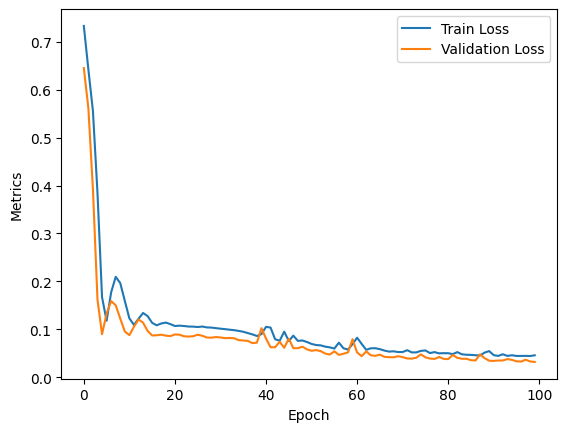

In [70]:

# Plot the full train and validation curves
plt.plot(full_history['loss'], label='Train Loss')
plt.plot(full_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [71]:
prediction = model.predict(X_test[1:2])

1/1 [==============================] - 0s 78ms/step


In [72]:
prediction.shape

(1, 400, 700, 1)

In [73]:
TEST_IMAGE = X_test[1]

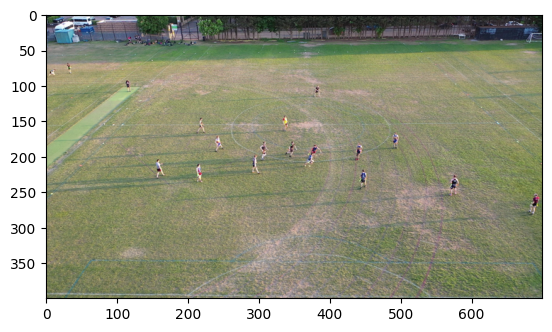

In [74]:
plt.imshow(TEST_IMAGE)

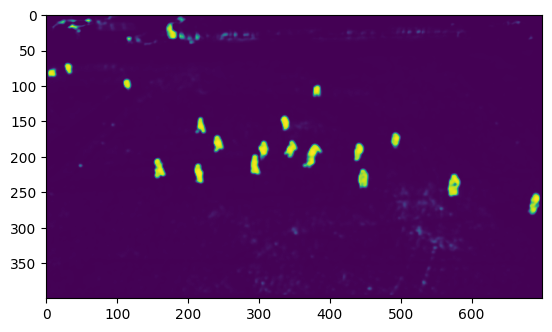

In [75]:
plt.imshow(prediction[0])

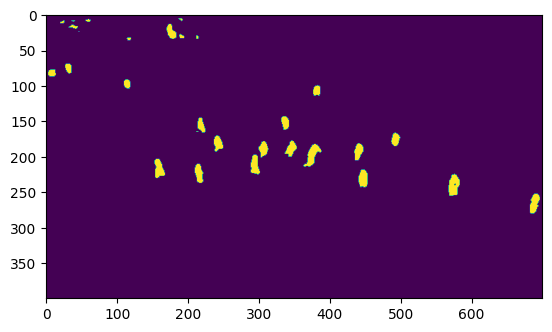

In [76]:
poloarize = prediction[0] > 0.5
plt.imshow(poloarize)

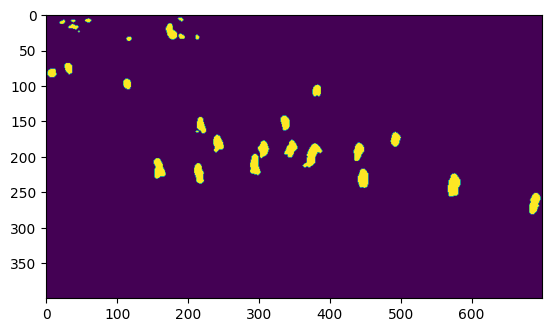

In [79]:

import numpy as np
from scipy.ndimage import binary_dilation

def expand_islands(matrix, n):
    # Create a structuring element for dilation
    structure = np.ones((3, 3), dtype=int)

    # Perform binary dilation on the matrix
    dilated_matrix = binary_dilation(matrix, iterations=n)

    return dilated_matrix

# Assuming you have a matrix called 'matrix' with islands of ones
expanded_matrix = expand_islands(poloarize, n=1)
plt.imshow(expanded_matrix)
     

[  0.  29.  38.  34.  18. 238.  71.   5.  51.  30.  37. 138. 129. 135.
 167. 212. 208.  11. 215. 262. 276. 259. 273. 447. 327. 340. 297. 334.
 448. 341.]


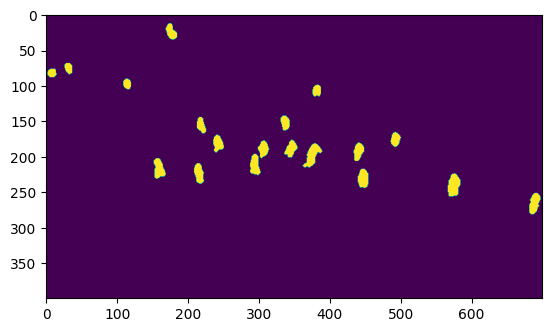

In [80]:
from scipy.ndimage import label, sum

def remove_small_islands(matrix, n):
    labeled_matrix, num_features = label(matrix)  # Label connected components
    component_sizes = sum(matrix, labeled_matrix, range(num_features + 1))  # Calculate sizes

    # Create a mask to filter out small islands
    print(component_sizes)
    mask = (component_sizes >= n)

    # Apply the mask to remove small islands
    filtered_matrix = mask[labeled_matrix]

    return filtered_matrix

# Assuming you have a matrix called 'matrix' with islands of ones
filtered_matrix = remove_small_islands(expanded_matrix, n=100)
plt.imshow(filtered_matrix)

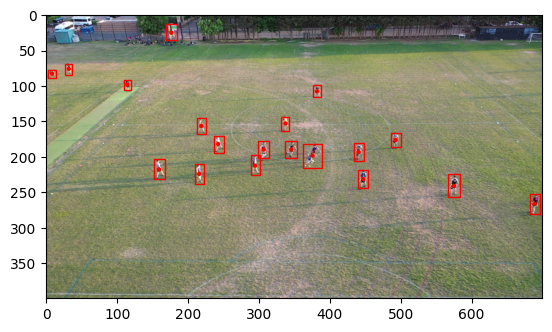

In [81]:
import numpy as np
from scipy.ndimage import label

def find_islands(matrix):

  # Apply the label function to find connected components
  labeled_matrix, num_labels = label(matrix)

  # Get the unique labels
  unique_labels = np.unique(labeled_matrix)

  # Assuming you have a matrix image 'image' and a list of points 'points'
  # Display the matrix image
  # plt.imshow(labeled_matrix)
  plt.imshow(TEST_IMAGE)

  # Set the plot aspect ratio to equal
  plt.gca().set_aspect('equal')

  # Iterate over the unique labels (excluding background label 0)
  for label_value in unique_labels[1:]:
      # Create a mask for the current label
      mask = (labeled_matrix == label_value)
      
      # Find the indices of the ones in the mask
      indices = np.where(mask)

      avg_y = indices[0].mean()
      avg_x = indices[1].mean()

      min_x = indices[1].min()
      max_x = indices[1].max()

      min_y = indices[0].min()
      max_y = indices[0].max()

      x, y = avg_x, avg_y
      circle = plt.Circle((x, y), radius=2, color='red', fill=True)

      rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y,
                         linewidth=1, edgecolor='r', facecolor='none')
      plt.gca().add_patch(circle)
      plt.gca().add_patch(rect)

      # print(avg_x, avg_y)
      # Print the coordinates of the island
      # print(f"Island {label_value}:")
      # for y, x in zip(indices[0], indices[1]):
      #     print(f"({x}, {y})")
      # print()
  plt.show()

find_islands(filtered_matrix)